
# How dominant are <font color='#d93954'>Liverpool</font>  and <font color='#40c4ff'>Mancester City</font> exactly?


#####  <div style="text-align: right"> May 2nd, 2022 </div>

<img width=1200px src='https://www.thisisanfield.com/wp-content/uploads/PA-29587739.jpg'>

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.set_palette("pastel")
pd.options.mode.chained_assignment = None
liv_color = '#d93954'
city_color = '#40c4ff'
avg_color = '#4d4d4d'

### With the title race in Premier League going to the wire yet again (remember 18/19 season), I will import dataset downloaded from Kaggle to analyze the data for Liverpool FC and Manchester City FC from the start of 2016/2017 season (first complete season with their current managers in charge).
#### In this analysis I will focus on comparing these 2 teams data against each other as well as against the average:
* Overall Win-Draw-Loss proportion
* Goals scored
* Games with 0 goals conceded (Clean Sheets)
* Shot volumes
* Shot accuracy

#### Additional Note: Last game in the data is April-10th-2022 match between Man City and Liverpool (2 : 2) which I find pretty symbolic! 🙂

In [2]:
results = pd.read_csv('../../pl_results_data/results.csv', encoding = "ISO-8859-1", parse_dates=['DateTime'])
results

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14 00:00:00+00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14 00:00:00+00:00,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14 00:00:00+00:00,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14 00:00:00+00:00,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14 00:00:00+00:00,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09 17:30:00+00:00,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10 14:00:00+00:00,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10 14:00:00+00:00,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10 14:00:00+00:00,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [3]:
results.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

##### Let's rename the columns using dictionary, just for the ease of use.

In [4]:
mapper = {
    'Season': 'season',
    'DateTime': 'date_time',
    'HomeTeam': 'home_team',
    'AwayTeam': 'away_team',
    'FTHG': 'full_time_home_team_goals',
    'FTAG': 'full_time_away_team_goals',
    'FTR': 'full_time_result',
    'HTHG': 'half_time_home_team_goals',
    'HTAG': 'half_time_away_team_goals',
    'HTR': 'half_time_result',
    'HS': 'home_team_shots',
    'AS': 'away_team_shots',
    'HST': 'home_team_shots_on_target',
    'AST': 'away_team_shots_on_target',
    'HC': 'home_team_corners',
    'AC': 'away_team_corners',
    'HF': 'home_team_fouls_committed',
    'AF': 'away_team_fouls_committed',
    'HY': 'home_team_yellow_cards',
    'AY': 'away_team_yellow_cards',
    'HR': 'home_team_red_cards',
    'AR': 'away_team_red_cards'
}

results.rename(columns=mapper, inplace=True)
results

,season,date_time,home_team,away_team,full_time_home_team_goals,full_time_away_team_goals,full_time_result,half_time_home_team_goals,half_time_away_team_goals,half_time_result,...,home_team_shots_on_target,away_team_shots_on_target,home_team_corners,away_team_corners,home_team_fouls_committed,away_team_fouls_committed,home_team_yellow_cards,away_team_yellow_cards,home_team_red_cards,away_team_red_cards
0,1993-94,1993-08-14 00:00:00+00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14 00:00:00+00:00,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14 00:00:00+00:00,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14 00:00:00+00:00,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14 00:00:00+00:00,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09 17:30:00+00:00,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10 14:00:00+00:00,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10 14:00:00+00:00,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10 14:00:00+00:00,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


##### Now let's filter out the data to include only games after July 1st 2016. Pep Guardiola was appointed from the start of 2016/2017 season and Jurgen Klopp was appointed in the middle of the 2015/2016 season.

In [5]:
df = results[results['date_time'] > '2016-08-01']
df

,season,date_time,home_team,away_team,full_time_home_team_goals,full_time_away_team_goals,full_time_result,half_time_home_team_goals,half_time_away_team_goals,half_time_result,...,home_team_shots_on_target,away_team_shots_on_target,home_team_corners,away_team_corners,home_team_fouls_committed,away_team_fouls_committed,home_team_yellow_cards,away_team_yellow_cards,home_team_red_cards,away_team_red_cards
8904,2016-17,2016-08-13 00:00:00+00:00,Burnley,Swansea,0,1,A,0.0,0.0,D,...,3.0,9.0,7.0,4.0,10.0,14.0,3.0,2.0,0.0,0.0
8905,2016-17,2016-08-13 00:00:00+00:00,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,4.0,3.0,3.0,6.0,12.0,15.0,2.0,2.0,0.0,0.0
8906,2016-17,2016-08-13 00:00:00+00:00,Everton,Tottenham,1,1,D,1.0,0.0,H,...,6.0,4.0,5.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0
8907,2016-17,2016-08-13 00:00:00+00:00,Hull,Leicester,2,1,H,1.0,0.0,H,...,5.0,5.0,5.0,3.0,8.0,17.0,2.0,2.0,0.0,0.0
8908,2016-17,2016-08-13 00:00:00+00:00,Man City,Sunderland,2,1,H,1.0,0.0,H,...,4.0,3.0,9.0,6.0,11.0,14.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09 17:30:00+00:00,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10 14:00:00+00:00,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10 14:00:00+00:00,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10 14:00:00+00:00,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [6]:
df.dtypes

season                                    object
date_time                    datetime64[ns, UTC]
home_team                                 object
away_team                                 object
full_time_home_team_goals                  int64
full_time_away_team_goals                  int64
full_time_result                          object
half_time_home_team_goals                float64
half_time_away_team_goals                float64
half_time_result                          object
Referee                                   object
home_team_shots                          float64
away_team_shots                          float64
home_team_shots_on_target                float64
away_team_shots_on_target                float64
home_team_corners                        float64
away_team_corners                        float64
home_team_fouls_committed                float64
away_team_fouls_committed                float64
home_team_yellow_cards                   float64
away_team_yellow_car

##### After checking the data types, I have realized there is no need for the columns to be floats since the values can be only integers (you can't have 3.5 yellow cards or shots on target in a single game). We will modify data types accordingly just for the efficiency.

In [7]:
df['half_time_home_team_goals'] = df['half_time_home_team_goals'].astype('int64')
df['half_time_away_team_goals'] = df['half_time_away_team_goals'].astype('int64')

df['home_team_shots'] = df['home_team_shots'].astype('int64')
df['away_team_shots'] = df['away_team_shots'].astype('int64')

df['home_team_shots_on_target'] = df['home_team_shots_on_target'].astype('int64')
df['away_team_shots_on_target'] = df['away_team_shots_on_target'].astype('int64')

df['home_team_corners'] = df['home_team_corners'].astype('int64')
df['away_team_corners'] = df['away_team_corners'].astype('int64')

df['home_team_fouls_committed'] = df['home_team_fouls_committed'].astype('int64')
df['away_team_fouls_committed'] = df['away_team_fouls_committed'].astype('int64')

df['home_team_yellow_cards'] = df['home_team_yellow_cards'].astype('int64')
df['away_team_yellow_cards'] = df['away_team_yellow_cards'].astype('int64')

df['home_team_red_cards'] = df['home_team_red_cards'].astype('int64')
df['away_team_red_cards'] = df['away_team_red_cards'].astype('int64')

##### Now I will need to write a function which will help me make a new column with the name of the team that won, or 'no_winner' if it was a draw in order to help me present the data.

In [8]:
def match_winner(x):
    if x['full_time_result'] == 'A':
        return x['away_team']
    elif x['full_time_result'] == 'H':
        return x['home_team']
    else:
        return 'no_winner'

In [9]:
match_outcome = df.apply(match_winner, axis=1)
df['winner'] = match_outcome

df

,season,date_time,home_team,away_team,full_time_home_team_goals,full_time_away_team_goals,full_time_result,half_time_home_team_goals,half_time_away_team_goals,half_time_result,...,away_team_shots_on_target,home_team_corners,away_team_corners,home_team_fouls_committed,away_team_fouls_committed,home_team_yellow_cards,away_team_yellow_cards,home_team_red_cards,away_team_red_cards,winner
8904,2016-17,2016-08-13 00:00:00+00:00,Burnley,Swansea,0,1,A,0,0,D,...,9,7,4,10,14,3,2,0,0,Swansea
8905,2016-17,2016-08-13 00:00:00+00:00,Crystal Palace,West Brom,0,1,A,0,0,D,...,3,3,6,12,15,2,2,0,0,West Brom
8906,2016-17,2016-08-13 00:00:00+00:00,Everton,Tottenham,1,1,D,1,0,H,...,4,5,6,10,14,0,0,0,0,no_winner
8907,2016-17,2016-08-13 00:00:00+00:00,Hull,Leicester,2,1,H,1,0,H,...,5,5,3,8,17,2,2,0,0,Hull
8908,2016-17,2016-08-13 00:00:00+00:00,Man City,Sunderland,2,1,H,1,0,H,...,3,9,6,11,14,1,2,0,0,Man City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09 17:30:00+00:00,Aston Villa,Tottenham,0,4,A,0,1,A,...,5,9,3,12,14,2,3,0,0,Tottenham
11109,2021-22,2022-04-10 14:00:00+00:00,Brentford,West Ham,2,0,H,0,0,D,...,1,4,6,2,6,0,1,0,0,Brentford
11110,2021-22,2022-04-10 14:00:00+00:00,Leicester,Crystal Palace,2,1,H,2,0,H,...,3,3,4,11,12,1,1,0,0,Leicester
11111,2021-22,2022-04-10 14:00:00+00:00,Norwich,Burnley,2,0,H,1,0,H,...,4,6,7,12,10,1,1,0,0,Norwich


##### Let's write the masks for filtering out only Liverpool and Manchester City games and make their own dataframes.

In [10]:
# MASKS:
liv_home = df['home_team'] == 'Liverpool'
liv_away = df['away_team'] == 'Liverpool'
city_home = df['home_team'] == 'Man City'
city_away = df['away_team'] == 'Man City'

In [11]:
liv = df[liv_home | liv_away]
city = df[city_home | city_away]

##### Now we need to write functions to get goals scored and conceded by both teams in their games.

In [12]:
def goals_scored_full_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['full_time_home_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['full_time_away_team_goals']
    
def goals_scored_half_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['half_time_home_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['half_time_away_team_goals']
    
def goals_scored_full_time_city(x):
    if x['home_team'] == 'Man City':
        return x['full_time_home_team_goals']
    elif x['away_team'] == 'Man City':
        return x['full_time_away_team_goals']
    
def goals_scored_half_time_city(x):
    if x['home_team'] == 'Man City':
        return x['half_time_home_team_goals']
    elif x['away_team'] == 'Man City':
        return x['half_time_away_team_goals']

In [13]:
liv_goals_scored_full = liv.apply(goals_scored_full_time_liv, axis=1)
liv['liv_full_time_goals_scored'] = liv_goals_scored_full

liv_goals_scored_half = liv.apply(goals_scored_half_time_liv, axis=1)
liv['liv_half_time_goals_scored'] = liv_goals_scored_half

city_goals_scored_full = city.apply(goals_scored_full_time_city, axis=1)
city['city_full_time_goals_scored'] = city_goals_scored_full

city_goals_scored_half = city.apply(goals_scored_half_time_city, axis=1)
city['city_half_time_goals_scored'] = city_goals_scored_half

In [14]:
def goals_conc_full_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['full_time_away_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['full_time_home_team_goals']

def goals_conc_half_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['half_time_away_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['half_time_home_team_goals']
    
def goals_conc_full_time_city(x):
    if x['home_team'] == 'Man City':
        return x['full_time_away_team_goals']
    elif x['away_team'] == 'Man City':
        return x['full_time_home_team_goals']

def goals_conc_half_time_city(x):
    if x['home_team'] == 'Man City':
        return x['half_time_away_team_goals']
    elif x['away_team'] == 'Man City':
        return x['half_time_home_team_goals']

In [15]:
liv_goals_conc_full = liv.apply(goals_conc_full_time_liv, axis=1)
liv['liv_full_time_goals_conc'] = liv_goals_conc_full

liv_goals_conc_half = liv.apply(goals_conc_half_time_liv, axis=1)
liv['liv_half_time_goals_conc'] = liv_goals_conc_half

city_goals_conc_full = city.apply(goals_conc_full_time_city, axis=1)
city['city_full_time_goals_conc'] = city_goals_conc_full

city_goals_conc_half = city.apply(goals_conc_half_time_city, axis=1)
city['city_half_time_goals_conc'] = city_goals_conc_half

##### We need one more function to determine the outcome of Win Draw Loss for our teams.

In [16]:
def win_loss_liv(x):
    if(x['winner'] == "Liverpool"):
        return "W"
    elif(x['winner'] == "no_winner"):
        return "D"
    else:
        return 'L'

def win_loss_city(x):
    if(x['winner'] == "Man City"):
        return "W"
    elif(x['winner'] == "no_winner"):
        return "D"
    else:
        return 'L'

In [17]:
liv_out = liv.apply(win_loss_liv, axis=1)
liv['outcome'] = liv_out
city_out = city.apply(win_loss_city, axis=1)
city['outcome'] = city_out

##### Let's find out the average percent of outcomes.

In [18]:
averages_WDL = df['full_time_result'].value_counts()[[0,2,1]]
real_avg = averages_WDL['H'] + averages_WDL['A']
averages_WDL['D'] = averages_WDL['D']
averages_WDL['H'] = real_avg / 2
averages_WDL['A'] = real_avg / 2
averages_WDL

H    854
D    501
A    854
Name: full_time_result, dtype: int64

###### One thing to notice is that I had to make real_avg variable, because full_time_result column is relying on the percentage of home team wins, and we don't want that in our calculation...

##### Finally, let's start creating plots. First we present the Win/Draw/Loss percentages.

### OVERAL W/D/L

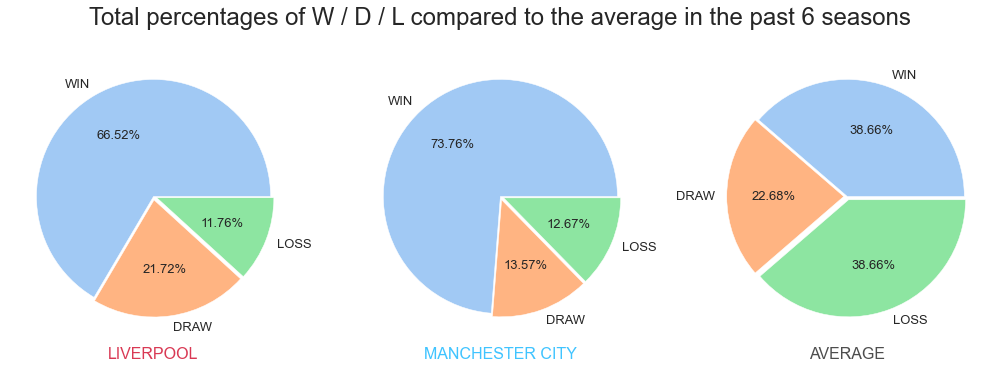

In [19]:
plt.figure(figsize=(14, 8))
plt.suptitle('Total percentages of W / D / L compared to the average in the past 6 seasons', fontsize=24, y=0.8)

plt.subplot(1,3,1)
liv['outcome'].value_counts().plot(
    labels=['WIN', 'DRAW', 'LOSS'],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03, 0.03),
    autopct='%1.2f%%'
)
plt.xlabel('LIVERPOOL', color=liv_color, fontsize=16)
plt.ylabel('')

plt.subplot(1,3,2)
city['outcome'].value_counts().plot(
    labels=['WIN', 'DRAW', 'LOSS'],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03, 0.03),
    autopct='%1.2f%%'
)
plt.xlabel('MANCHESTER CITY', color=city_color, fontsize=16)
plt.ylabel('')

plt.subplot(1,3,3)
averages_WDL.plot(
    labels=['WIN', 'DRAW', 'LOSS'],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03, 0.03),
    autopct='%1.2f%%'
)
plt.xlabel('AVERAGE', color=avg_color, fontsize=16)
plt.ylabel('')

plt.tight_layout()
plt.show()

#### We can conclude the dominance of these 2 teams with Man City doubling the average win percentages, and Liverpool being close by.

### GOALS SCORED / CONCEDED

#### Next we will see the average of goals scored against the opposition for both teams.

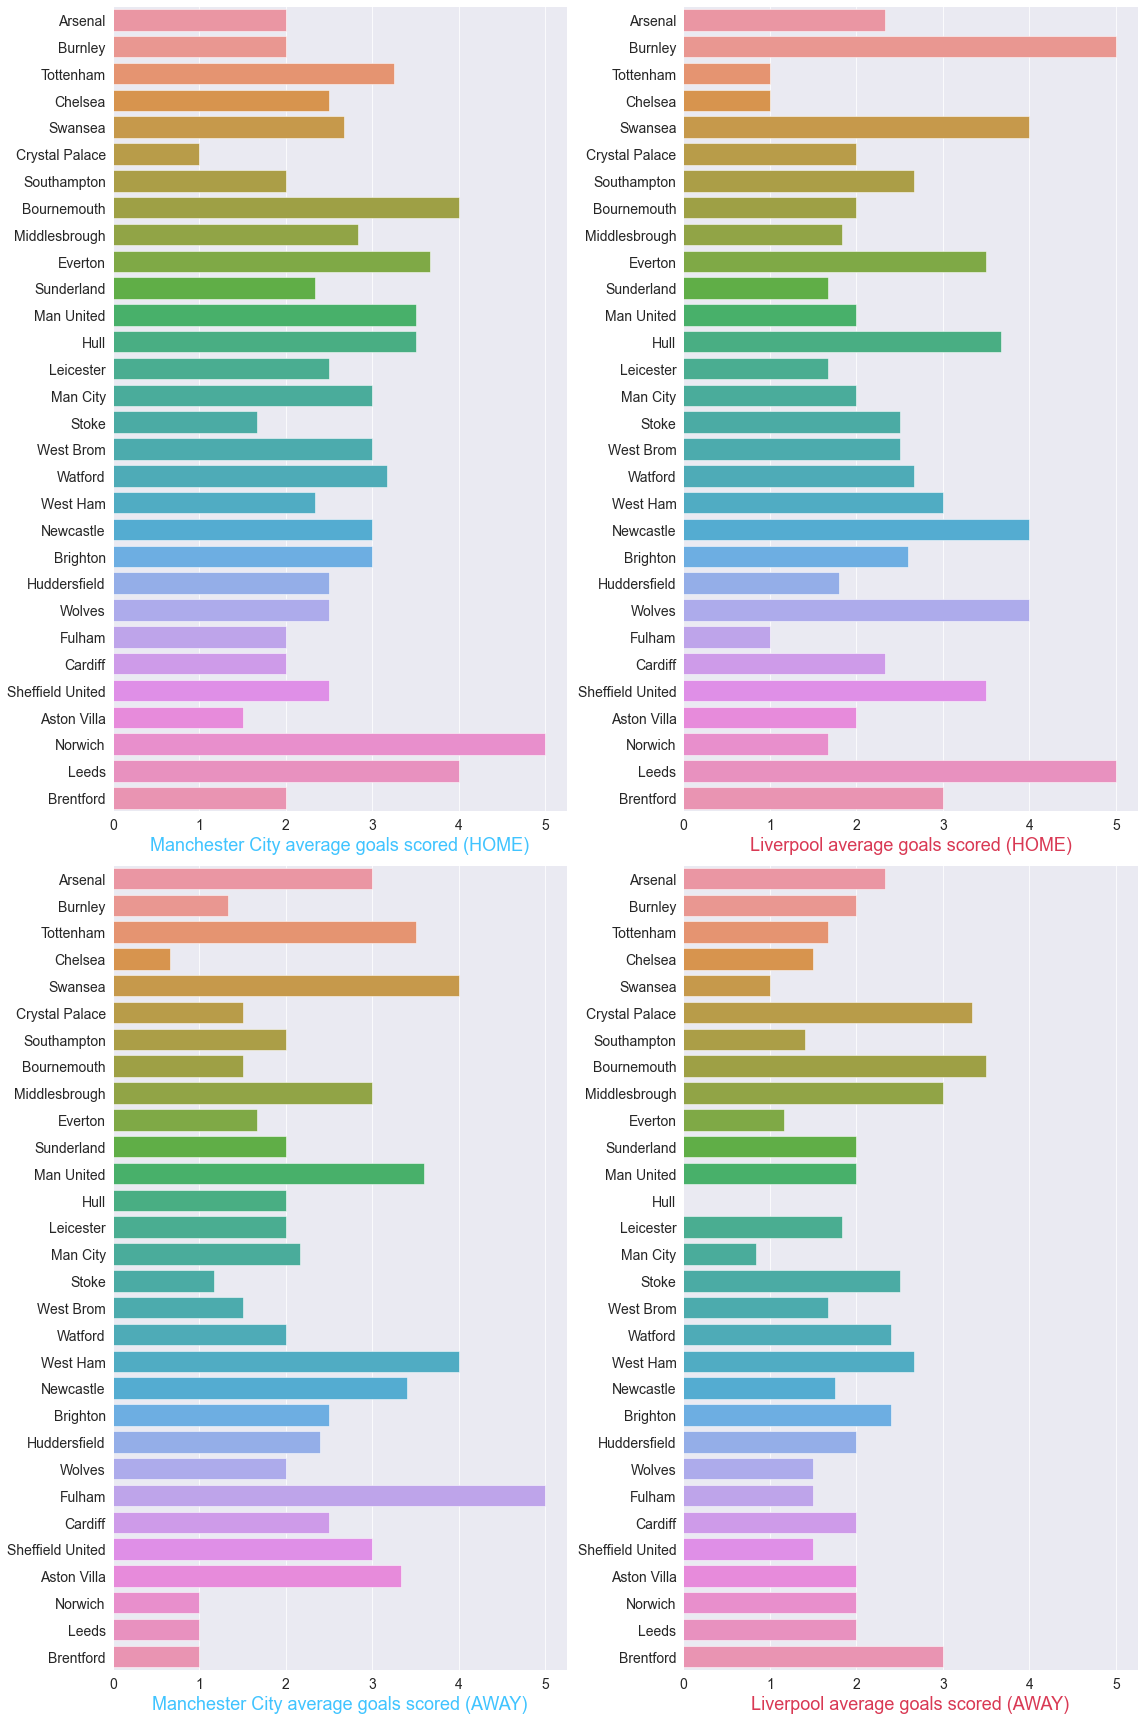

In [20]:
city_home = city[city['home_team'] == 'Man City']
city_away = city[city['away_team'] == 'Man City']
liv_home = liv[liv['home_team'] == 'Liverpool']
liv_away = liv[liv['away_team'] == 'Liverpool']

plt.figure(figsize=(16,24))

ax1 = plt.subplot(2,2,1)
sns.barplot(
    data=city_home,
    x='city_full_time_goals_scored',
    y='away_team',
    ci=None,
)
plt.xlabel('Manchester City average goals scored (HOME)', fontsize=18, color=city_color)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2, sharex=ax1, sharey=ax1)
sns.barplot(
    data=liv_home,
    x='liv_full_time_goals_scored',
    y='away_team',
    ci=None,
)
plt.xlabel('Liverpool average goals scored (HOME)', fontsize=18, color=liv_color)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3, sharex=ax1, sharey=ax1)
sns.barplot(
    data=city_away,
    x='city_full_time_goals_scored',
    y='home_team',
    ci=None
)
plt.xlabel('Manchester City average goals scored (AWAY)', fontsize=18, color=city_color)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4, sharex=ax1, sharey=ax1)
sns.barplot(
    data=liv_away,
    x='liv_full_time_goals_scored',
    y='home_team',
    ci=None
)
plt.xlabel('Liverpool average goals scored (AWAY)', fontsize=18, color=liv_color)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')

plt.tight_layout()
plt.show()

#### From the first glance at the charts, it seems that Man City scores more goals. Let's see how they compare to each other as well as how do they stack against the average goals scored by Home and Away teams in recent years.

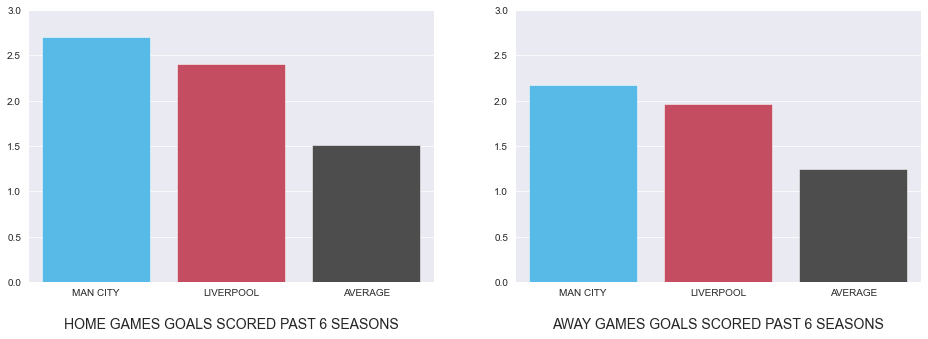

In [21]:
city_goals_home = city_home['city_full_time_goals_scored']
liv_goals_home = liv_home['liv_full_time_goals_scored']
city_goals_away = city_away['city_full_time_goals_scored']
liv_goals_away = liv_away['liv_full_time_goals_scored']
goals_home = df['full_time_home_team_goals']
goals_away = df['full_time_away_team_goals']

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
ax = sns.barplot(data=[city_goals_home, liv_goals_home, goals_home], ci=None, palette=[city_color, liv_color, avg_color])
plt.ylim(0, 3)
ax.set_xticklabels(['MAN CITY', 'LIVERPOOL', 'AVERAGE'])
plt.xlabel('HOME GAMES GOALS SCORED PAST 6 SEASONS', fontsize=14, labelpad=20)

plt.subplot(1,2,2)
ax = sns.barplot(data=[city_goals_away, liv_goals_away, goals_away], ci=None, palette=[city_color, liv_color, avg_color])
plt.ylim(0, 3)
ax.set_xticklabels(['MAN CITY', 'LIVERPOOL', 'AVERAGE'])
plt.xlabel('AWAY GAMES GOALS SCORED PAST 6 SEASONS', fontsize=14, labelpad=20)

plt.show()

##### Man City has a slight advantage, but both teams are around 2.5 goals scored at home and 2.0 goals scored away from home!
##### Let's dive further in the numbers and see them by seasons.

#### I will make a new column for our goals by season average.

In [22]:
df['total_goals_scored_on_match_divided_by_2'] = (df['full_time_home_team_goals'] + df['full_time_away_team_goals']) / 2

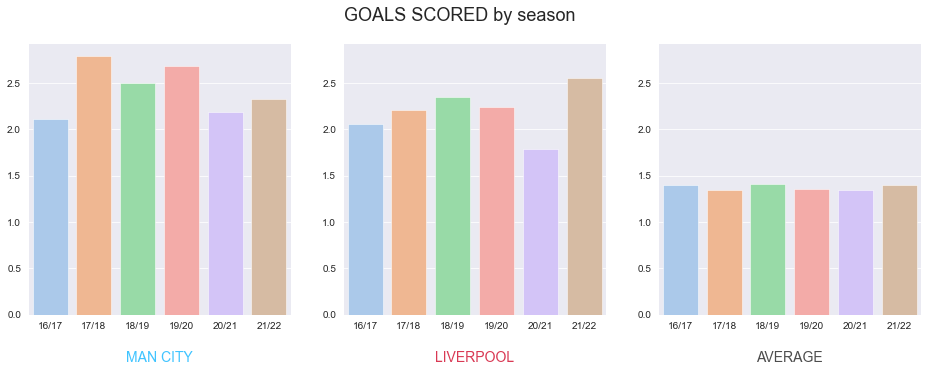

In [23]:
plt.figure(figsize=(16,5))
plt.suptitle('GOALS SCORED by season', fontsize=18)

ax = plt.subplot(1,3,1)
sns.barplot(data=city, y='city_full_time_goals_scored', x='season', ci=None, orient='v')
plt.xlabel('MAN CITY', color=city_color, fontsize=14, labelpad=20)
plt.ylabel('')
ax.set_xticklabels(labels=['16/17', '17/18', '18/19', '19/20', '20/21', '21/22'])

ax = plt.subplot(1,3,2, sharey=ax)
sns.barplot(data=liv, y='liv_full_time_goals_scored', x='season', ci=None, orient='v')
plt.xlabel('LIVERPOOL', color=liv_color, fontsize=14, labelpad=20)
plt.ylabel('')
ax.set_xticklabels(labels=['16/17', '17/18', '18/19', '19/20', '20/21', '21/22'])

ax = plt.subplot(1,3,3, sharey=ax)
sns.barplot(data=df, y='total_goals_scored_on_match_divided_by_2', x='season', ci=None, orient='v')
plt.xlabel('AVERAGE', color=avg_color, fontsize=14, labelpad=20)
plt.ylabel('')
ax.set_xticklabels(labels=['16/17', '17/18', '18/19', '19/20', '20/21', '21/22'])

plt.show()

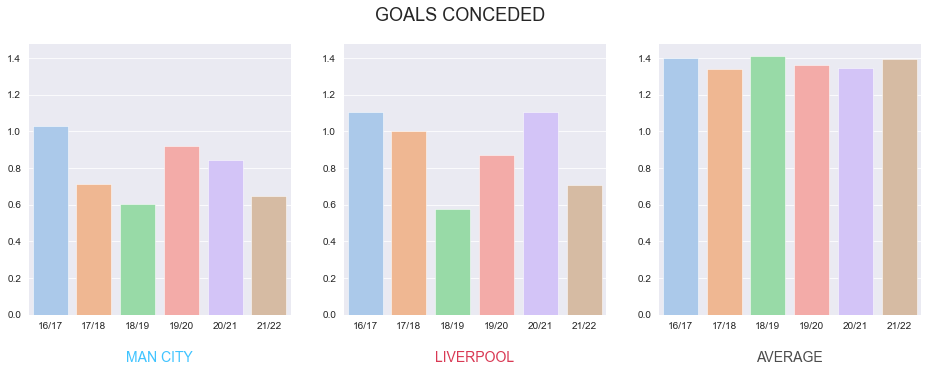

In [24]:
plt.figure(figsize=(16,5))
plt.suptitle('GOALS CONCEDED', fontsize=18)

ax = plt.subplot(1,3,1)
sns.barplot(data=city, y='city_full_time_goals_conc', x='season', ci=None, orient='v')
plt.xlabel('MAN CITY', color=city_color, fontsize=14, labelpad=20)
plt.ylabel('')
ax.set_xticklabels(labels=['16/17', '17/18', '18/19', '19/20', '20/21', '21/22'])

ax = plt.subplot(1,3,2, sharey=ax)
sns.barplot(data=liv, y='liv_full_time_goals_conc', x='season', ci=None, orient='v')
plt.xlabel('LIVERPOOL', color=liv_color, fontsize=14, labelpad=20)
plt.ylabel('')
ax.set_xticklabels(labels=['16/17', '17/18', '18/19', '19/20', '20/21', '21/22'])

ax = plt.subplot(1,3,3, sharey=ax)
sns.barplot(data=df, y='total_goals_scored_on_match_divided_by_2', x='season', ci=None, orient='v')
plt.xlabel('AVERAGE', color=avg_color, fontsize=14, labelpad=20)
plt.ylabel('')
ax.set_xticklabels(labels=['16/17', '17/18', '18/19', '19/20', '20/21', '21/22'])

plt.show()

#### We can see that their defences are usually around 0.5 goals conceded per game better than the average. Notable is Liverpool's 20/21 season 1.1 goal conceded which overlaps with the absence of their best defender Virgil Van Dijk for the duration of the season (10/18/20 - 06/30/21).

#### Let's see the distribution of the goals scored through out the past years.

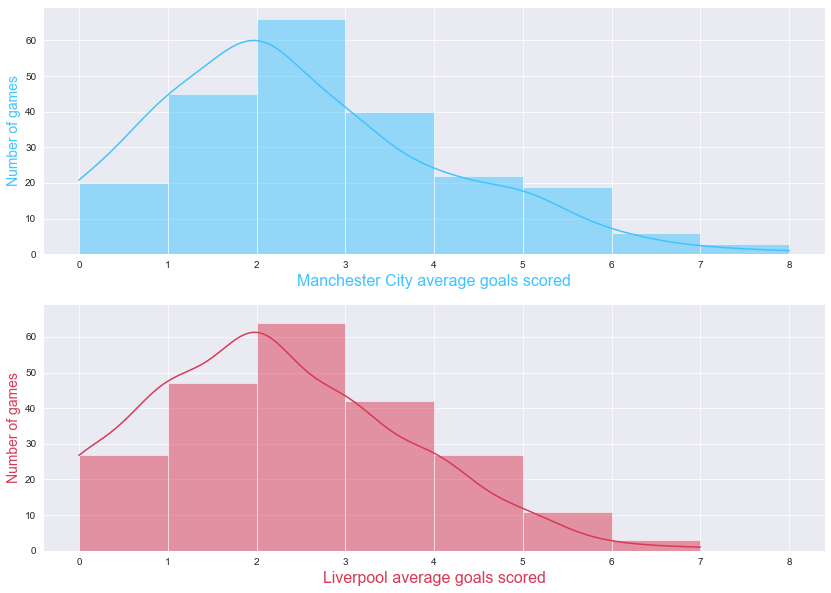

In [25]:
plt.figure(figsize=(14,10))

ax = plt.subplot(2,1,1)
sns.histplot(data=city, x='city_full_time_goals_scored', kde=True, bins=8, binwidth=1, color=city_color)
plt.xlabel('Manchester City average goals scored', fontsize='16', color=city_color)
plt.ylabel('Number of games', fontsize=14, color=city_color)

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.histplot(data=liv, x='liv_full_time_goals_scored', kde=True, bins=8, binwidth=1, color=liv_color)
plt.xlabel('Liverpool average goals scored', fontsize='16', color=liv_color)
plt.ylabel('Number of games', fontsize=14, color=liv_color)

plt.show()

#### Both teams are pretty equal as you can see from the KDE lines.

#### Let's see the averages...

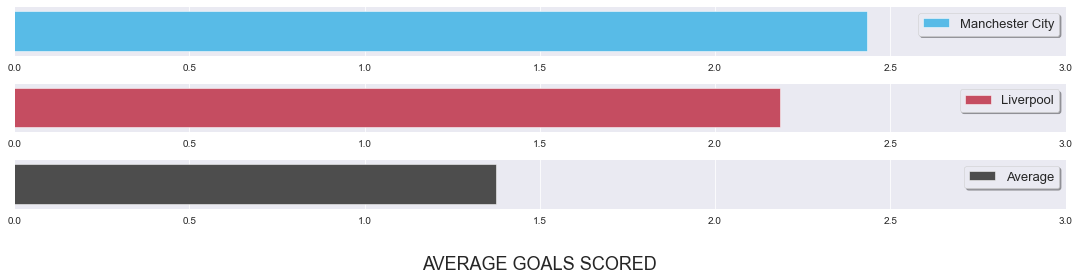

In [26]:
plt.figure(figsize=(15,4))

ax = plt.subplot(3,1,1)
sns.barplot(data=city, x='city_full_time_goals_scored', color=city_color, ci=None, label='Manchester City')
plt.xlabel("")
plt.legend(frameon=True, shadow=True, fontsize=13)

plt.subplot(3,1,2, sharex=ax)
sns.barplot(data=liv, x='liv_full_time_goals_scored', color=liv_color, ci=None, label='Liverpool')
plt.xlabel("")
plt.legend(frameon=True, shadow=True, fontsize=13)

plt.subplot(3,1,3, sharex=ax)
sns.barplot(data=df, x='total_goals_scored_on_match_divided_by_2', color=avg_color, ci=None, label='Average')
plt.xlabel("")
plt.legend(frameon=True, shadow=True, fontsize=13)

plt.xlabel('AVERAGE GOALS SCORED', fontsize=18, labelpad=30)

plt.tight_layout()
plt.xlim(0,3)
plt.show()

#### And finally goals conceded averages...

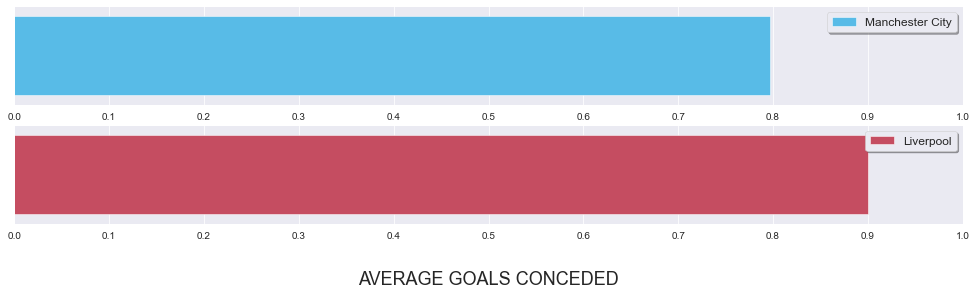

In [27]:
sns.set_style('darkgrid')
sns.set_palette("pastel")

plt.figure(figsize=(17,4))

ax = plt.subplot(2,1,1)
sns.barplot(data=city, x='city_full_time_goals_conc', color='#40c4ff', ci=None, label='Manchester City')
plt.xlabel("")
plt.legend(frameon=True, shadow=True, fontsize=12)

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.barplot(data=liv, x='liv_full_time_goals_conc', color='#d93954', ci=None, label='Liverpool')
plt.xlabel("")
plt.xlim(0, 1)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend(frameon=True, shadow=True, fontsize=12)
plt.xlabel('AVERAGE GOALS CONCEDED', fontsize=18, labelpad=30)

plt.show()

In [28]:
city_2021 = city[city['date_time'] > '2021-08-01']
city_2021
liv_2021 = liv[liv['date_time'] > '2021-08-01']
liv_2021
avg_2021 = df[df['date_time'] > '2021-08-01']
avg_2021['total_goals_scored_on_match_divided_by_2'] = (avg_2021['full_time_home_team_goals'] + avg_2021['full_time_away_team_goals']) / 2

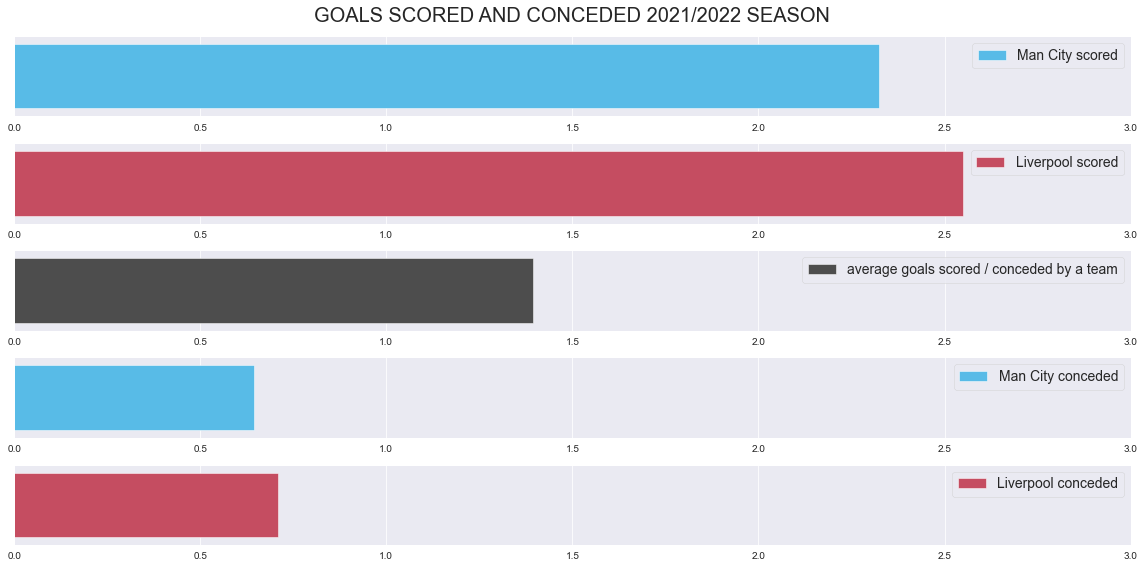

In [29]:
plt.figure(figsize=(16,8))
plt.suptitle('GOALS SCORED AND CONCEDED 2021/2022 SEASON', fontsize=20)

ax = plt.subplot(5,1,1)
sns.barplot(data=city_2021, x='city_full_time_goals_scored', ci=None, color=city_color, label='Man City scored')
plt.xlabel('')
plt.legend(fontsize=14)

plt.subplot(5,1,2, sharex=ax)
sns.barplot(data=liv_2021, x='liv_full_time_goals_scored', ci=None, color=liv_color, label='Liverpool scored')
plt.xlabel('')
plt.xlim(0,3)
plt.legend(fontsize=14)

plt.subplot(5,1,3, sharex=ax)
sns.barplot(data=avg_2021, x='total_goals_scored_on_match_divided_by_2', ci=None, color=avg_color, label='average goals scored / conceded by a team' )
plt.xlabel('')
plt.legend(fontsize=14)

plt.subplot(5,1,4, sharex=ax)
sns.barplot(data=city_2021, x='city_full_time_goals_conc', ci=None, color=city_color, label='Man City conceded')
plt.xlabel('')
plt.legend(fontsize=14)

plt.subplot(5,1,5, sharex=ax)
sns.barplot(data=liv_2021, x='liv_full_time_goals_conc', ci=None, color=liv_color, label='Liverpool conceded')
plt.xlabel('')
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


##### We can see that Liverpool is scoring slightly more, but also they conced more goals than Man City this season.

#### Distribution of the goals conceded..

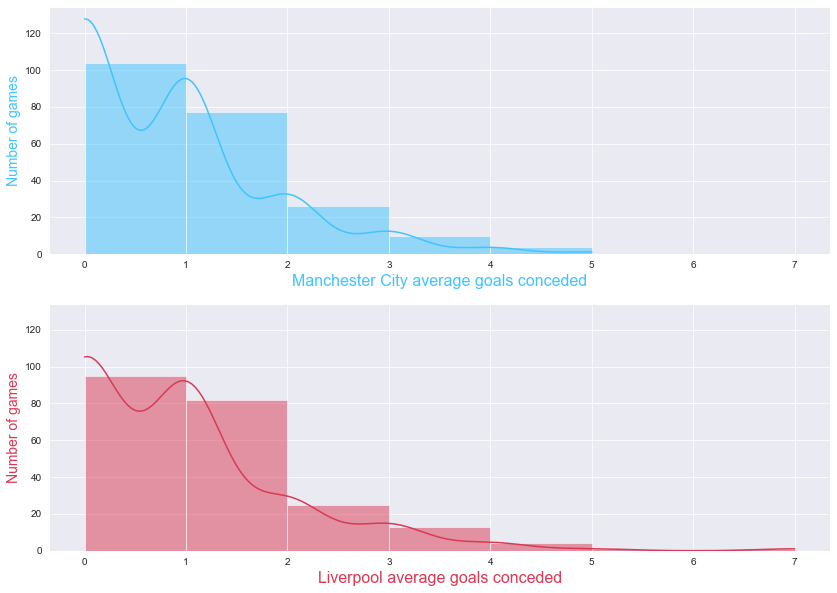

In [30]:
plt.figure(figsize=(14,10))

ax = plt.subplot(2,1,1)
sns.histplot(data=city, x='city_full_time_goals_conc', kde=True, bins=8, binwidth=1, color=city_color)
plt.xlabel('Manchester City average goals conceded', fontsize='16', color=city_color)
plt.ylabel('Number of games', fontsize=14, color=city_color)

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.histplot(data=liv, x='liv_full_time_goals_conc', kde=True, bins=8, binwidth=1, color=liv_color)
plt.xlabel('Liverpool average goals conceded', fontsize='16', color=liv_color)
plt.ylabel('Number of games', fontsize=14, color=liv_color)

plt.show()

#### No matter what kind of data, or what kind of viewing angle we take, dominance of this two teams can not be denied, and more we look at it, the more it seems they are shoulder to shoulder in almost every parameter.

### CLEAN SHEETS

#### First let's make functions to get clean sheet column values...

In [31]:
def clean_sheet_liv(x):
    if (x['liv_full_time_goals_conc'] == 0):
        return True
    else:
        return False
    
def clean_sheet_city(x):
    if (x['city_full_time_goals_conc'] == 0):
        return True
    else:
        return False

In [32]:
liv['clean_sheet'] = liv.apply(clean_sheet_liv, axis=1)
city['clean_sheet'] = city.apply(clean_sheet_city, axis=1)
city_2021 = city[city['date_time'] > '2021-08-01']
liv_2021 = liv[liv['date_time'] > '2021-08-01']

#### Now let's calculate average league clean sheet percentages and compare it to our teams.

In [33]:
AVG_CLEAN_SHEET_PCT = (df[df['full_time_home_team_goals']  == 0].shape[0] + df[df['full_time_away_team_goals']  == 0].shape[0]) * 100 / (df.shape[0] * 2)

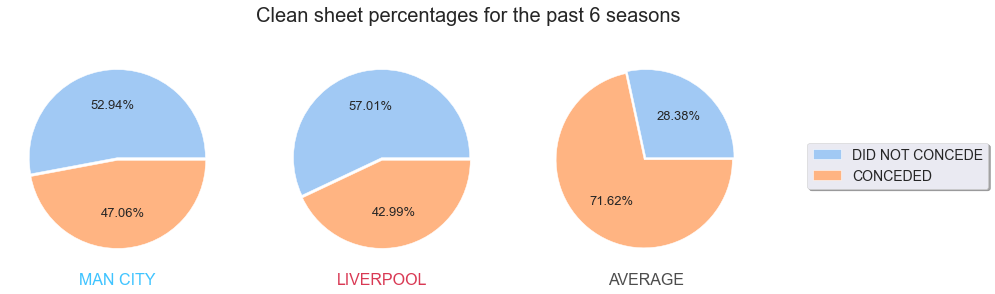

In [34]:
data_03 = pd.Series([AVG_CLEAN_SHEET_PCT, 100 - AVG_CLEAN_SHEET_PCT])
labels = ['DID NOT CONCEDE', 'CONCEDED']
plt.figure(figsize=(16,10))
plt.suptitle('Clean sheet percentages for the past 6 seasons', fontsize=20, y=0.7)

plt.subplot(1,3,1)
city['clean_sheet'].value_counts().plot(
    labels=["", ""],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03),
    autopct='%1.2f%%'
)
plt.ylabel('')
plt.xlabel('MAN CITY', color=city_color, fontsize=16)

plt.subplot(1,3,2)
liv['clean_sheet'].value_counts().plot(
    labels=["", ""],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03),
    autopct='%1.2f%%'
)
plt.ylabel('')
plt.xlabel('LIVERPOOL', color=liv_color, fontsize=16)

plt.subplot(1,3,3)
data_03.plot(
    labels=labels,
    kind='pie',
    fontsize=13,
    explode=(0, 0.03),
    autopct='%1.2f%%',
    labeldistance=None
)
plt.ylabel('')
plt.xlabel('AVERAGE', color=avg_color, fontsize=16)

plt.legend(bbox_to_anchor=(1.2,0.6), frameon=True, shadow=True, fontsize=14)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.show()

#### Let's see the numbers for this season only...

In [35]:
df_2021 = df[df['date_time'] > '2021-08-01']
avg_clean_sheet_pct_2021 = df_2021[df_2021['full_time_home_team_goals'] == 0].shape[0] + df_2021[df_2021['full_time_away_team_goals'] == 0].shape[0]
avg_clean_sheet_pct_2021 = avg_clean_sheet_pct_2021 / 2 * 100 / df_2021.shape[0]

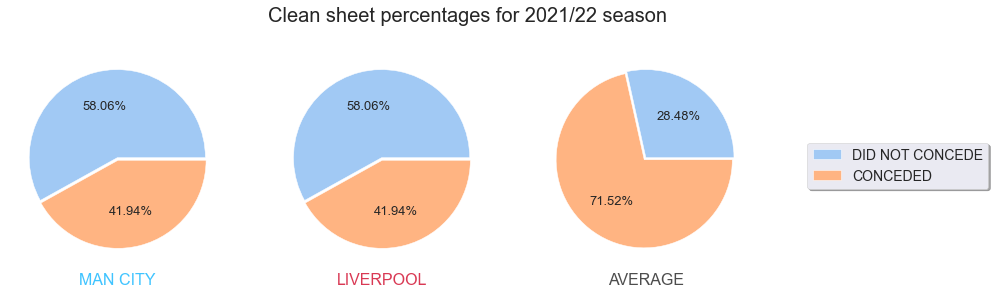

In [36]:
data_03 = pd.Series([avg_clean_sheet_pct_2021, 100 - avg_clean_sheet_pct_2021])
labels = ['DID NOT CONCEDE', 'CONCEDED']
plt.figure(figsize=(16,10))
plt.suptitle('Clean sheet percentages for 2021/22 season', fontsize=20, y=0.7)

plt.subplot(1,3,1)
city_2021['clean_sheet'].value_counts().plot(
    labels=["", ""],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03),
    autopct='%1.2f%%'
)
plt.ylabel('')
plt.xlabel('MAN CITY', color=city_color, fontsize=16)

plt.subplot(1,3,2)
liv_2021['clean_sheet'].value_counts().plot(
    labels=["", ""],
    kind='pie',
    fontsize=13,
    explode=(0, 0.03),
    autopct='%1.2f%%'
)
plt.ylabel('')
plt.xlabel('LIVERPOOL', color=liv_color, fontsize=16)

plt.subplot(1,3,3)
data_03.plot(
    labels=labels,
    kind='pie',
    fontsize=13,
    explode=(0, 0.03),
    autopct='%1.2f%%',
    labeldistance=None
)
plt.ylabel('')
plt.xlabel('AVERAGE', color=avg_color, fontsize=16)

plt.legend(bbox_to_anchor=(1.2,0.6), frameon=True, shadow=True, fontsize=14)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.show()

#### Finally, after all these calculcations, we conclude that the number of games in which these 2 teams didn't concede a single goal this season is more than doubled compared to the league average which is mind blowing especially in a league that is considered hardest by most soccer fans.

### SHOTS (and shots on target)

#### Let's compare the amonut of shots for our two teams in the past seasons, since that is often the most reliable insight in soccer matches.

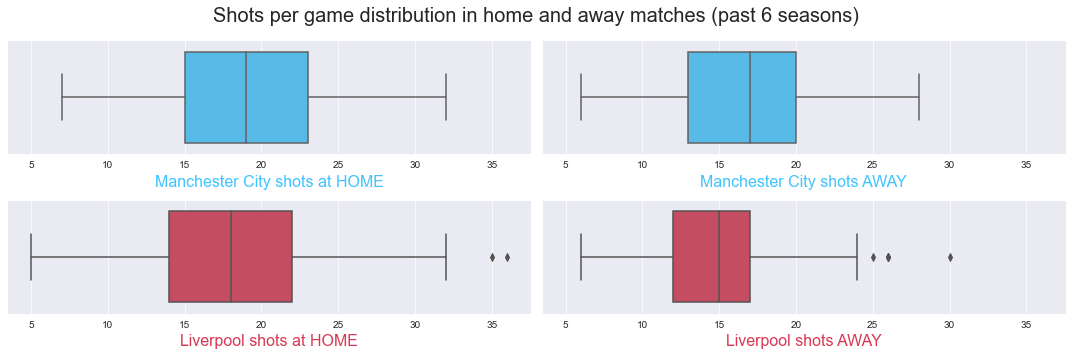

In [37]:
# MASKS:
liv_home = df['home_team'] == 'Liverpool'
liv_away = df['away_team'] == 'Liverpool'
city_home = df['home_team'] == 'Man City'
city_away = df['away_team'] == 'Man City'

plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots per game distribution in home and away matches (past 6 seasons)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=df[city_home], x='home_team_shots', color=city_color)
plt.xlabel('Manchester City shots at HOME', color=city_color, fontsize=16)

plt.subplot(2,2,2, sharex=ax1)
sns.boxplot(data=df[city_away], x='away_team_shots', color=city_color)
plt.xlabel('Manchester City shots AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=df[liv_home], x='home_team_shots', color=liv_color)
plt.xlabel('Liverpool shots at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax1)
sns.boxplot(data=df[liv_away], x='away_team_shots', color=liv_color)
plt.xlabel('Liverpool shots AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

#### Slightly higher number of shots on average for Manchester City, especially in away games.
#### Let's check shots on target.

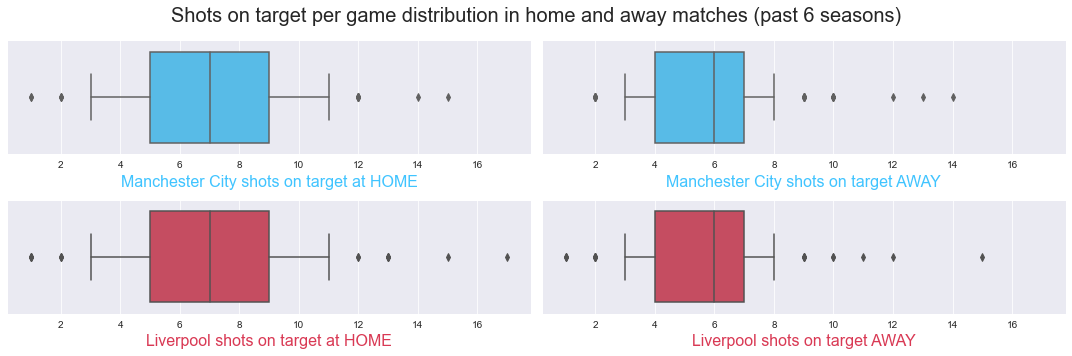

In [38]:
plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots on target per game distribution in home and away matches (past 6 seasons)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=df[city_home], x='home_team_shots_on_target', color=city_color, whis=0.5)
plt.xlabel('Manchester City shots on target at HOME', color=city_color, fontsize=16)

plt.subplot(2,2,2, sharex=ax1)
sns.boxplot(data=df[city_away], x='away_team_shots_on_target', color=city_color, whis=0.5)
plt.xlabel('Manchester City shots on target AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=df[liv_home], x='home_team_shots_on_target', color=liv_color, whis=0.5)
plt.xlabel('Liverpool shots on target at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax1)
sns.boxplot(data=df[liv_away], x='away_team_shots_on_target', color=liv_color, whis=0.5)
plt.xlabel('Liverpool shots on target AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

#### When it comes to the shots on target volumes, as we can see from the plots, it doesn't get more tied than this.
#### Now let's see the defensive numbers for shots conceded and shots on target conceded per game...

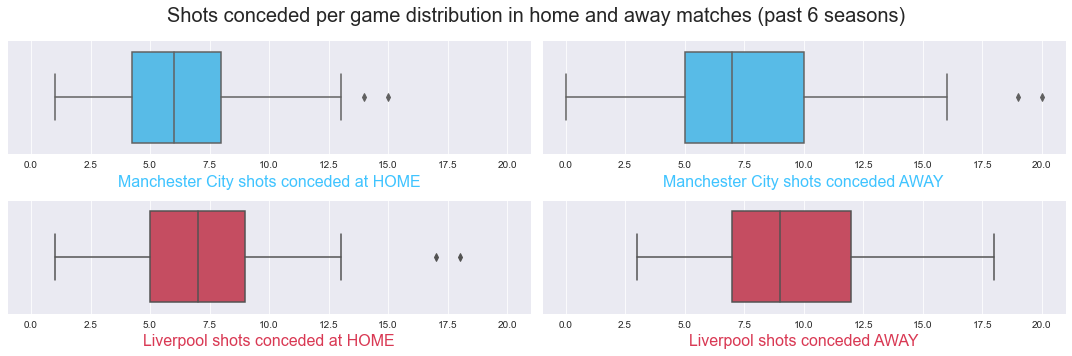

In [39]:
plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots conceded per game distribution in home and away matches (past 6 seasons)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=df[city_home], x='away_team_shots', color=city_color)
plt.xlabel('Manchester City shots conceded at HOME', color=city_color, fontsize=16)

plt.subplot(2,2,2, sharex=ax1)
sns.boxplot(data=df[city_away], x='home_team_shots', color=city_color)
plt.xlabel('Manchester City shots conceded AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=df[liv_home], x='away_team_shots', color=liv_color)
plt.xlabel('Liverpool shots conceded at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax1)
sns.boxplot(data=df[liv_away], x='home_team_shots', color=liv_color)
plt.xlabel('Liverpool shots conceded AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

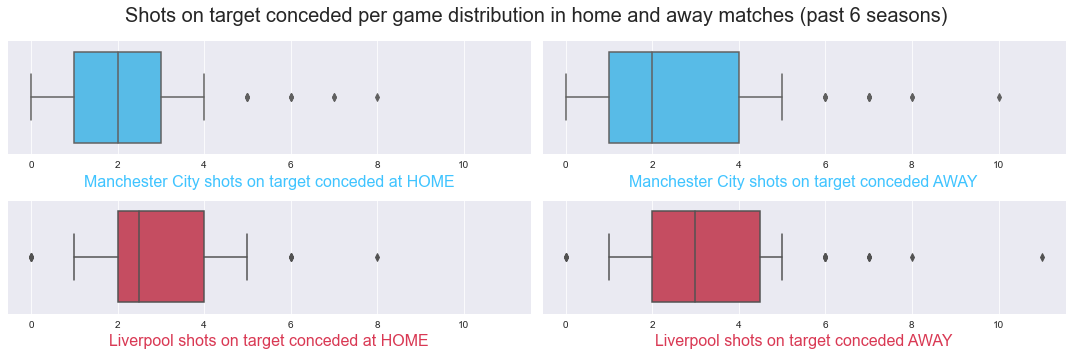

In [40]:
plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots on target conceded per game distribution in home and away matches (past 6 seasons)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=df[city_home], x='away_team_shots_on_target', color=city_color, whis=0.5)
plt.xlabel('Manchester City shots on target conceded at HOME', color=city_color, fontsize=16)

plt.subplot(2,2,2, sharex=ax1)
sns.boxplot(data=df[city_away], x='home_team_shots_on_target', color=city_color, whis=0.5)
plt.xlabel('Manchester City shots on target conceded AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=df[liv_home], x='away_team_shots_on_target', color=liv_color, whis=0.5)
plt.xlabel('Liverpool shots on target conceded at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax1)
sns.boxplot(data=df[liv_away], x='home_team_shots_on_target', color=liv_color, whis=0.5)
plt.xlabel('Liverpool shots on target conceded AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

#### It seems that Manchester City has a little sturdier defence, especially at their own stadium.

#### Time to check this season numbers...

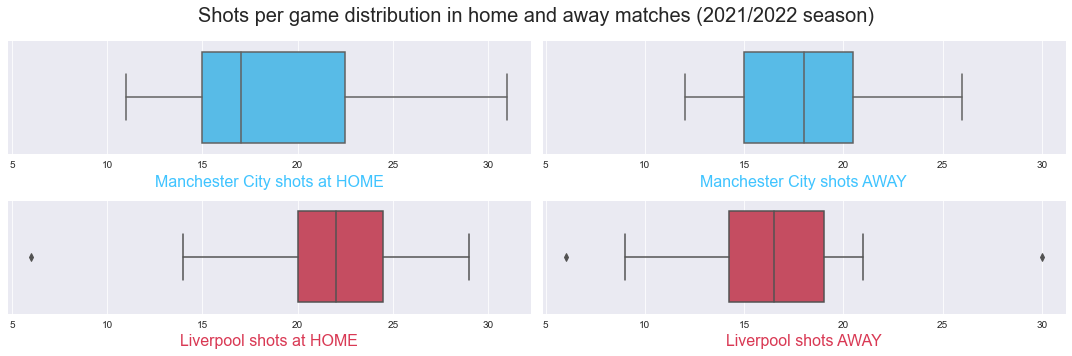

In [41]:
# MASKS:
liv_home_2021 = liv_2021['home_team'] == 'Liverpool'
liv_away_2021 = liv_2021['away_team'] == 'Liverpool'
city_home_2021 = city_2021['home_team'] == 'Man City'
city_away_2021 = city_2021['away_team'] == 'Man City'

plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots per game distribution in home and away matches (2021/2022 season)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=city_2021[city_home_2021], x='home_team_shots', color=city_color)
plt.xlabel('Manchester City shots at HOME', color=city_color, fontsize=16)

ax2 = plt.subplot(2,2,2)
sns.boxplot(data=city_2021[city_away_2021], x='away_team_shots', color=city_color)
plt.xlabel('Manchester City shots AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=liv_2021[liv_home_2021], x='home_team_shots', color=liv_color)
plt.xlabel('Liverpool shots at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax2)
sns.boxplot(data=liv_2021[liv_away_2021], x='away_team_shots', color=liv_color)
plt.xlabel('Liverpool shots AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

#### We see that Liverpool tends to shoot more at home while they shoot slightly less than Man City when playing away from home.

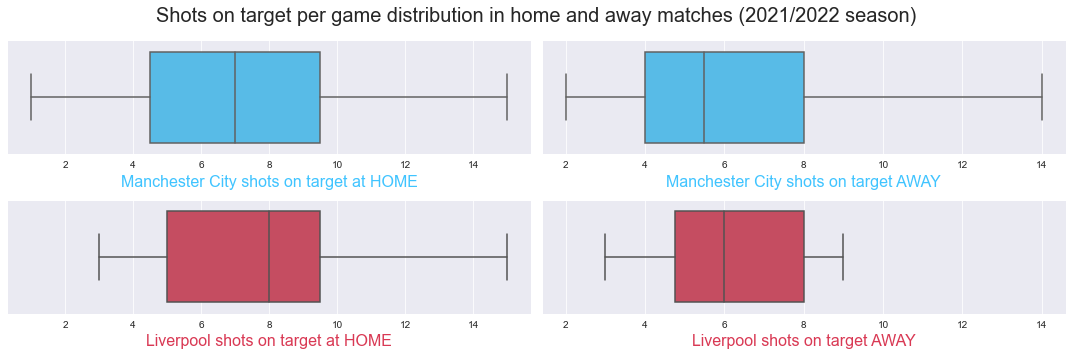

In [42]:
plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots on target per game distribution in home and away matches (2021/2022 season)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=city_2021[city_home_2021], x='home_team_shots_on_target', color=city_color)
plt.xlabel('Manchester City shots on target at HOME', color=city_color, fontsize=16)

ax2 = plt.subplot(2,2,2)
sns.boxplot(data=city_2021[city_away_2021], x='away_team_shots_on_target', color=city_color)
plt.xlabel('Manchester City shots on target AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=liv_2021[liv_home_2021], x='home_team_shots_on_target', color=liv_color)
plt.xlabel('Liverpool shots on target at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax2)
sns.boxplot(data=liv_2021[liv_away_2021], x='away_team_shots_on_target', color=liv_color)
plt.xlabel('Liverpool shots on target AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

#### When it comes to shots on target we see Liverpool having slightly more shots on target in both home and away matches.

#### Again let's check defensive stats for shots and shots on target conceded for this season.

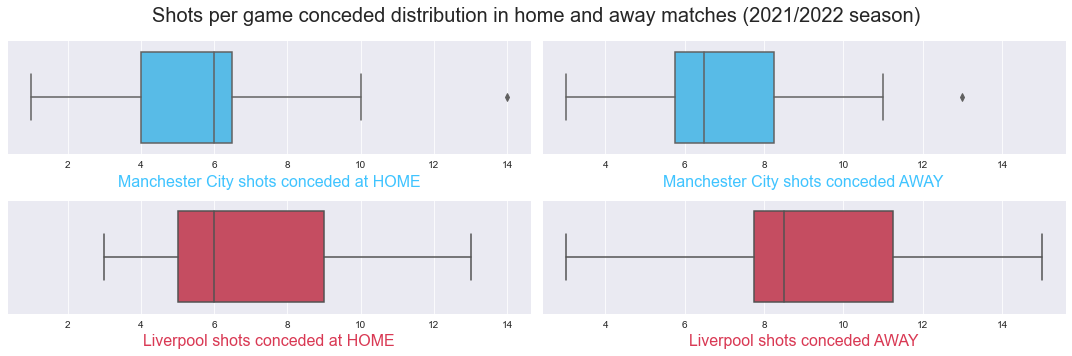

In [43]:
plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots per game conceded distribution in home and away matches (2021/2022 season)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=city_2021[city_home_2021], x='away_team_shots', color=city_color)
plt.xlabel('Manchester City shots conceded at HOME', color=city_color, fontsize=16)

ax2 = plt.subplot(2,2,2)
sns.boxplot(data=city_2021[city_away_2021], x='home_team_shots', color=city_color)
plt.xlabel('Manchester City shots conceded AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=liv_2021[liv_home_2021], x='away_team_shots', color=liv_color)
plt.xlabel('Liverpool shots conceded at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax2)
sns.boxplot(data=liv_2021[liv_away_2021], x='home_team_shots', color=liv_color)
plt.xlabel('Liverpool shots conceded AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

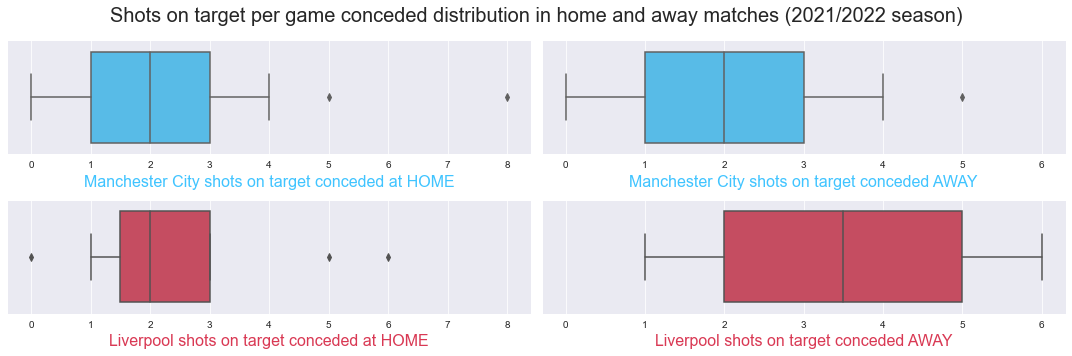

In [44]:
plt.figure(figsize=(15,5))
plt.suptitle(
    'Shots on target per game conceded distribution in home and away matches (2021/2022 season)',
    fontsize=20
)

ax1 = plt.subplot(2,2,1)
sns.boxplot(data=city_2021[city_home_2021], x='away_team_shots_on_target', color=city_color, whis=0.5)
plt.xlabel('Manchester City shots on target conceded at HOME', color=city_color, fontsize=16)

ax2 = plt.subplot(2,2,2)
sns.boxplot(data=city_2021[city_away_2021], x='home_team_shots_on_target', color=city_color, whis=0.5)
plt.xlabel('Manchester City shots on target conceded AWAY', color=city_color, fontsize=16)

plt.subplot(2,2,3, sharex=ax1)
sns.boxplot(data=liv_2021[liv_home_2021], x='away_team_shots_on_target', color=liv_color, whis=0.5)
plt.xlabel('Liverpool shots on target conceded at HOME', color=liv_color, fontsize=16)

plt.subplot(2,2,4, sharex=ax2)
sns.boxplot(data=liv_2021[liv_away_2021], x='home_team_shots_on_target', color=liv_color, whis=0.5)
plt.xlabel('Liverpool shots on target conceded AWAY', color=liv_color, fontsize=16)

plt.tight_layout()
plt.show()

#### Liverpool's defence tends to concede more shots on target, but they have the same amounts of clean sheets this season as we saw earlier from the analysis, probably due to their goalkeeper Allison's performances.

### SHOT ACCURACY

#### For the last part, let's see both teams shot accuracy...

In [45]:
def acc_func_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['home_team_shots_on_target'] / x['home_team_shots']
    else:
        return x['away_team_shots_on_target'] / x['away_team_shots']
    
def acc_func_city(x):
    if x['home_team'] == 'Man City':
        return x['home_team_shots_on_target'] / x['home_team_shots']
    else:
        return x['away_team_shots_on_target'] / x['away_team_shots']

In [46]:
liv['shot_acc'] = liv.apply(acc_func_liv, axis=1)
city['shot_acc'] = city.apply(acc_func_city, axis=1)

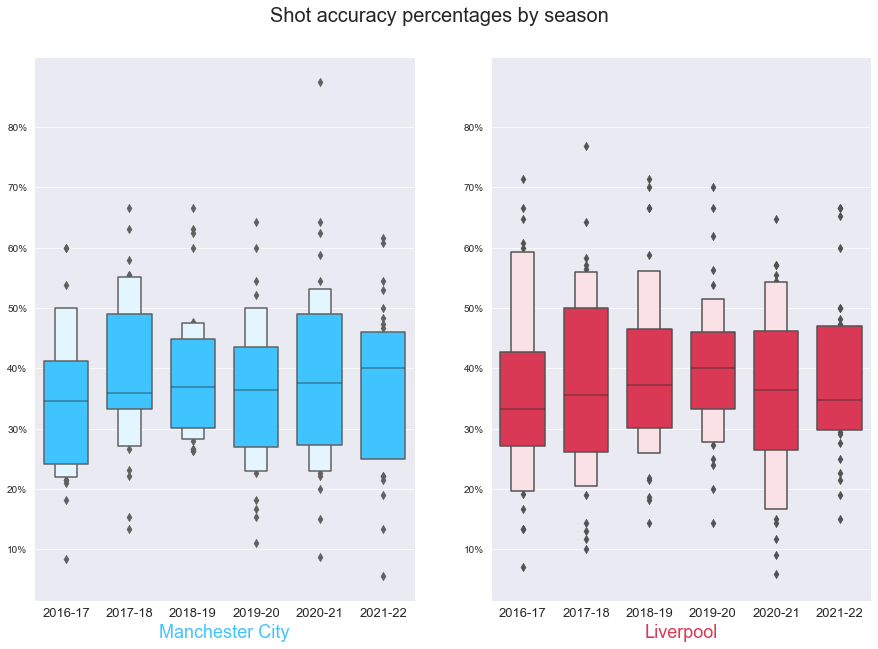

In [47]:
plt.figure(figsize=(15,10))
plt.suptitle('Shot accuracy percentages by season', fontsize=20, y=0.95)

ax = plt.subplot(1,2,1)
sns.boxenplot(
    data=city,
    y='shot_acc',
    x='season',
    color=city_color,
    saturation=1,
    width=0.7
)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.xlabel('Manchester City', color=city_color, fontsize=18)
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
ax.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%'])

plt.subplot(1,2,2, sharey=ax)
sns.boxenplot(
    data=liv,
    y='shot_acc',
    x='season',
    color=liv_color,
    saturation=1,
    width=0.7
)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.xlabel('Liverpool', color=liv_color, fontsize=18)


plt.show()

#### Finally let's see how their shot accuracy compares this season...

In [50]:
city_liv_2021 = pd.concat([city, liv], keys=['city', 'liv'])
city_liv_2021 = city_liv_2021[city_liv_2021['date_time'] > '2021-08-01']
city_liv_2021.loc[city_liv_2021['city_half_time_goals_conc'].isna(), 'team'] = 'Liverpool'
city_liv_2021.loc[city_liv_2021['liv_half_time_goals_conc'].isna(), 'team'] = 'Man City'
city_liv_2021

season                 date_time  home_team    away_team  \
city 10813  2021-22 2021-08-15 16:30:00+00:00  Tottenham     Man City   
     10818  2021-22 2021-08-21 15:00:00+00:00   Man City      Norwich   
     10824  2021-22 2021-08-28 12:30:00+00:00   Man City      Arsenal   
     10837  2021-22 2021-09-11 15:00:00+00:00  Leicester     Man City   
     10848  2021-22 2021-09-18 15:00:00+00:00   Man City  Southampton   
...             ...                       ...        ...          ...   
liv  11067  2021-22 2022-03-05 17:30:00+00:00  Liverpool     West Ham   
     11075  2021-22 2022-03-12 12:30:00+00:00   Brighton    Liverpool   
     11086  2021-22 2022-03-16 20:15:00+00:00    Arsenal    Liverpool   
     11092  2021-22 2022-04-02 12:30:00+00:00  Liverpool      Watford   
     11112  2021-22 2022-04-10 16:30:00+00:00   Man City    Liverpool   

            full_time_home_team_goals  full_time_away_team_goals  \
city 10813                          1                          0   
     10818                          5                          0   
     10824                          5                          0   
     10837                          0                          1   
     10848                          0                          0   
...                               ...                        ...   
liv  11067                          1                          0   
     11075                          0                          2   
     11086                          0                          2   
     11092                          2                          0   
     11112                          2                          2   

           full_time_result  half_time_home_team_goals  \
city 10813                H                          0   
     10818                H                          2   
     10824                H                          3   
     10837                A                          0   
     10848                D                          0   
...                     ...                        ...   
liv  11067                H                          1   
     11075                A                          0   
     11086                A                          0   
     11092                H                          1   
     11112                D                          2   

            half_time_away_team_goals half_time_result  ...  \
city 10813                          0                D  ...   
     10818                          0                H  ...   
     10824                          0                H  ...   
     10837                          0                D  ...   
     10848                          0                D  ...   
...                               ...              ...  ...   
liv  11067                          0                H  ...   
     11075                          1                A  ...   
     11086                          0                D  ...   
     11092                          0                H  ...   
     11112                          1                H  ...   

           city_full_time_goals_conc  city_half_time_goals_conc  outcome  \
city 10813                       1.0                        0.0        L   
     10818                       0.0                        0.0        W   
     10824                       0.0                        0.0        W   
     10837                       0.0                        0.0        W   
     10848                       0.0                        0.0        D   
...                              ...                        ...      ...   
liv  11067                       NaN                        NaN        W   
     11075                       NaN                        NaN        W   
     11086                       NaN                        NaN        W   
     11092                       NaN                        NaN        W   
     11112                   

#### Now we can visualize how accurate they were this season...

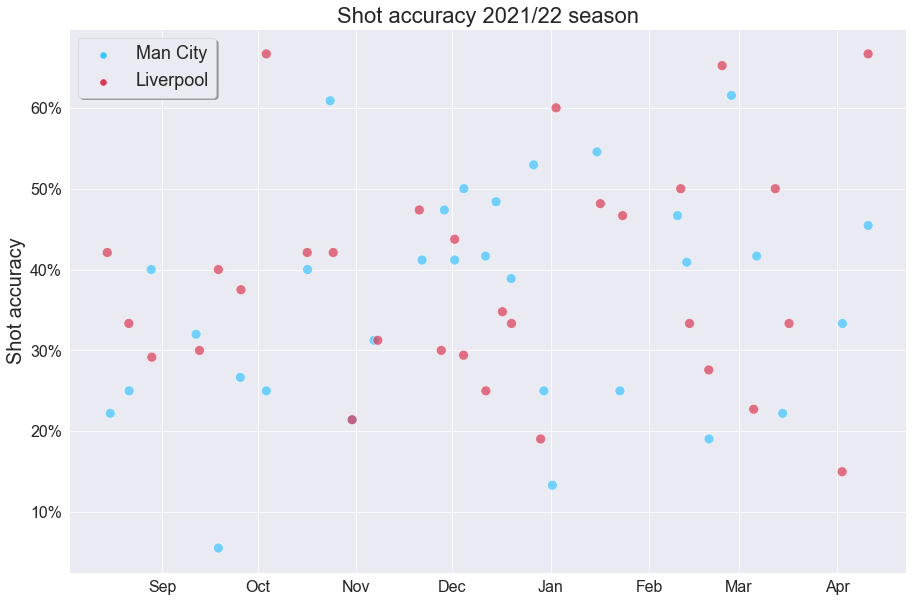

In [52]:
plt.figure(figsize=(15,10))
plt.title('Shot accuracy 2021/22 season', fontsize=22)

ax = sns.scatterplot(
    data=city_liv_2021,
    x='date_time',
    y='shot_acc',
    hue='team',
    palette=[city_color, liv_color],
    s=100,
    alpha=0.7
)
ax.set_xticks(['2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04'])
ax.set_xticklabels(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'], fontsize=16)
ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%'], fontsize=16)
plt.xlabel('')
plt.ylabel('Shot accuracy', fontsize=20)
ax.legend(fontsize=18, frameon=True, shadow=True)

plt.show()

### SUMMARY

### We can see that the trend for past 6 seasons is a two horse title race in the Premier League, with some other teams ocasionally entering the race for a season. When compared to the average, Liverpool and Manchester City numbers are thorugh the roof and it seems as they get better from season to season. From the analysis we can conclude that Manchester City is slighly ahead when we take past years into consideration, but Liverpool has slighly better form this season mostly attacking wise. I suspect we could have the same last round title battle as 3 seasons ago, and on top of that we could also have Champions League Final between these two Goliaths.